In [344]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [345]:
#Data Loading 
df=pd.read_csv("/Users/preethamhd/Downloads/Loan_data_dup.csv")

In [346]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         593 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [348]:
df['Total_Icome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [349]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Icome           0
dtype: int64

In [350]:
df['Married']=df['Married'].replace('No','Married')
df['Married']=df['Married'].replace('Yes','Unmarried')
df['Education']=df['Education'].replace('Not Graduate','Not_graduated')
df['Self_Employed']=df['Self_Employed'].replace('Yes','Employed')
df['Self_Employed']=df['Self_Employed'].replace('No','Selfemployed')

In [351]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [352]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [353]:
df.rename(columns={'Self_Employed':'Employment'},inplace=True)
df.rename(columns={'ApplicantIncome':'Income'},inplace=True)
df.rename(columns={'CoapplicantIncome':'Co_applicant_income'},inplace=True)
df.rename(columns={'Property_Area':'Area'},inplace=True)
df.rename(columns={'Loan_Amount_Term':'Term'},inplace=True)
df.rename(columns={'Married':'Marital_status'},inplace=True)

In [354]:
df['Co_applicant_income'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: Co_applicant_income, Length: 287, dtype: int64

In [355]:
coapplicat_mean=df['Co_applicant_income'].mean()

In [356]:
df['Co_applicant_income']=df['Co_applicant_income'].replace([0.0],coapplicat_mean)

In [357]:
Loan_amount_mean=df['LoanAmount'].mean()

In [358]:
df['LoanAmount']=df['LoanAmount'].replace(0.0,Loan_amount_mean)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

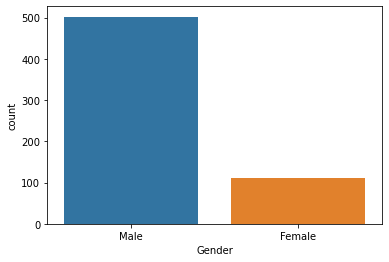

In [359]:
sns.countplot(df['Gender'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

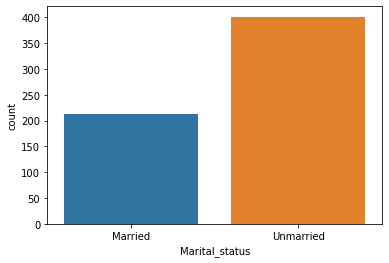

In [360]:
sns.countplot(df['Marital_status'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment', ylabel='count'>

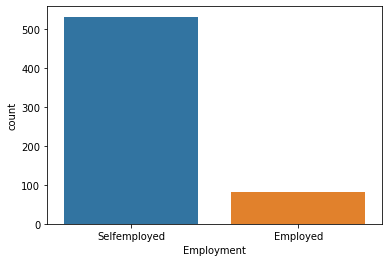

In [361]:
sns.countplot(df['Employment'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

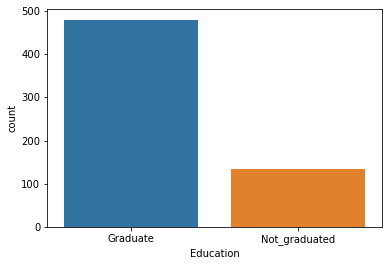

In [362]:
sns.countplot(df['Education'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='count'>

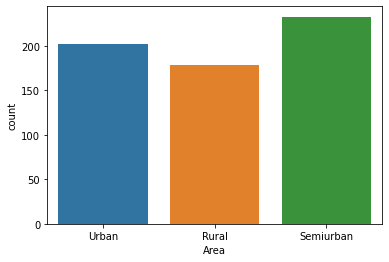

In [363]:
sns.countplot(df['Area'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

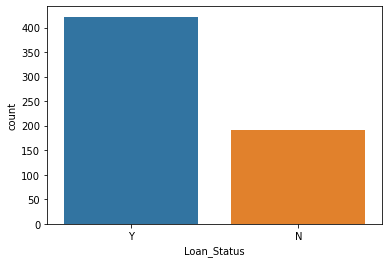

In [364]:
sns.countplot(df['Loan_Status'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

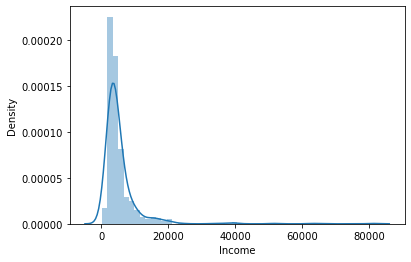

In [365]:
sns.distplot(df['Income'])

In [366]:
df['Income_log']=np.log(df['Income'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income_log', ylabel='Density'>

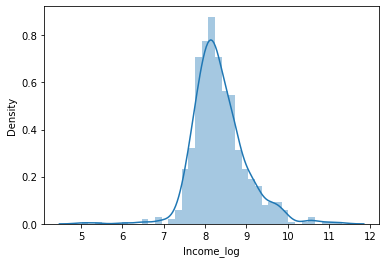

In [367]:
sns.distplot(df['Income_log'])

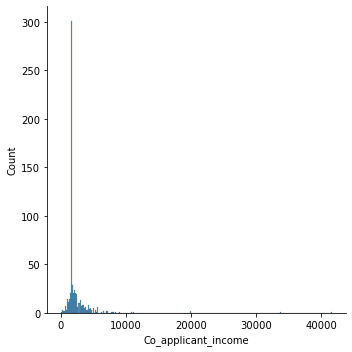

In [368]:
sns.displot(df['Co_applicant_income'])

In [369]:
df['Co_applicant_income_log']=np.log(df['Co_applicant_income'])

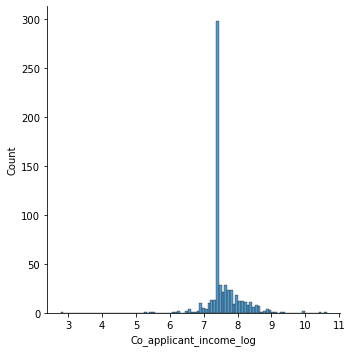

In [370]:
sns.displot(df['Co_applicant_income_log'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Icome', ylabel='Density'>

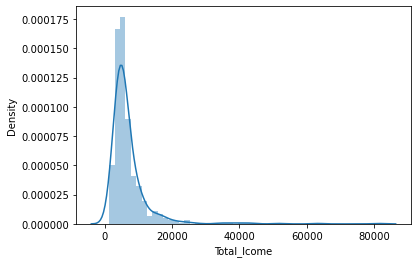

In [371]:
sns.distplot(df['Total_Icome'])

In [372]:
df['Total_Icome_log']=np.log(df['Total_Icome'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Icome_log', ylabel='Density'>

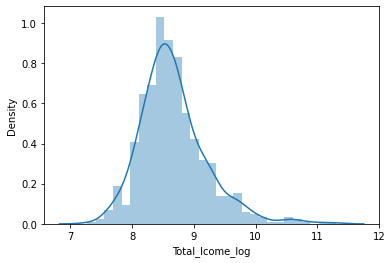

In [373]:
sns.distplot(df['Total_Icome_log'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

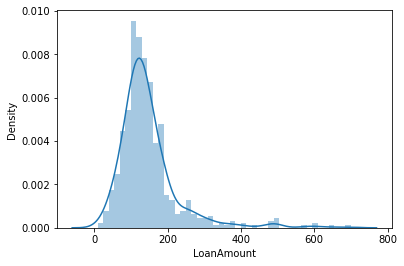

In [374]:
sns.distplot(df['LoanAmount'])

In [375]:
df['Loan_amount_log']=np.log(df['LoanAmount'])

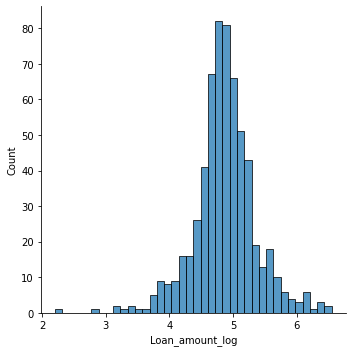

In [376]:
sns.displot(df['Loan_amount_log'])

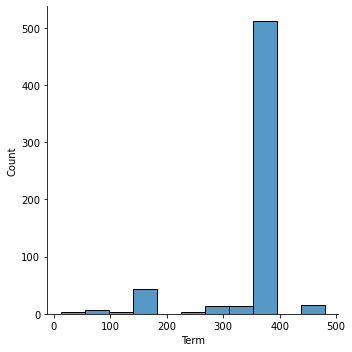

In [377]:
sns.displot(df['Term'])

In [378]:
df['Term_log']=np.log(df['Term'])

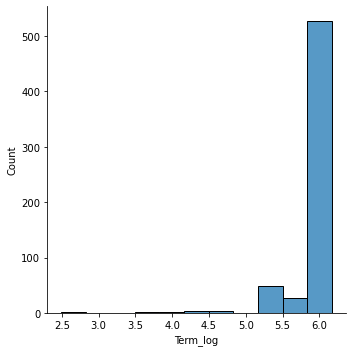

In [379]:
sns.displot(df['Term_log'])

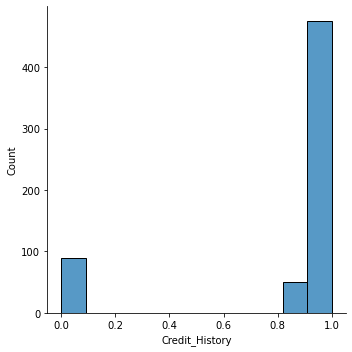

In [380]:
sns.displot(df['Credit_History'])

<AxesSubplot:>

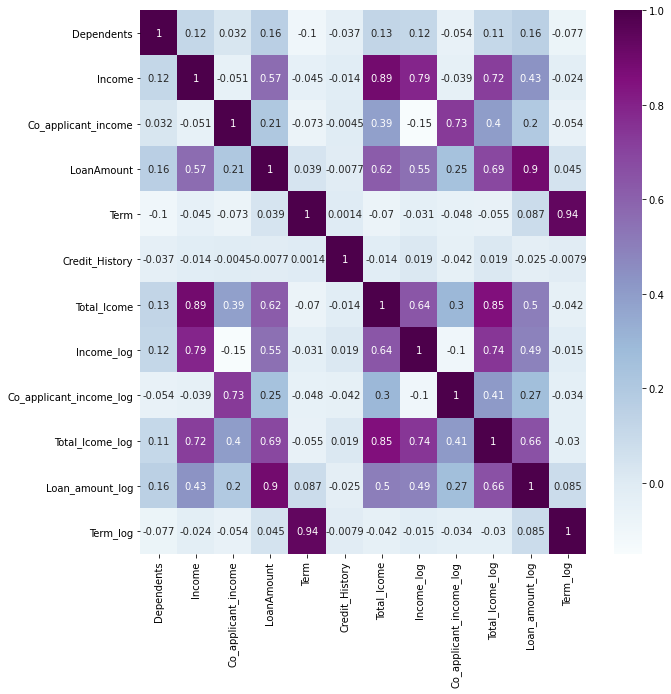

In [381]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [432]:
Evaluation

,Loan_ID,Gender,Marital_status,Dependents,Education,Employment,Income,Co_applicant_income,LoanAmount,Term,Credit_History,Area,Loan_Status,Total_Icome,Income_log,Co_applicant_income_log,Total_Icome_log,Loan_amount_log,Term_log
0,LP001002,Male,Married,0.0,Graduate,Selfemployed,5849,1621.245798,146.165261,360.0,1.0,Urban,Y,5849.0,8.674026,7.390950,8.674026,4.984738,5.886104
1,LP001003,Male,Unmarried,1.0,Graduate,Selfemployed,4583,1508.000000,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,8.714568,4.852030,5.886104
2,LP001005,Male,Unmarried,0.0,Graduate,Employed,3000,1621.245798,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,7.390950,8.006368,4.189655,5.886104
3,LP001006,Male,Unmarried,0.0,Not_graduated,Selfemployed,2583,2358.000000,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,8.505323,4.787492,5.886104
4,LP001008,Male,Married,0.0,Graduate,Selfemployed,6000,1621.245798,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,7.390950,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,Married,0.0,Graduate,Selfemployed,2900,1621.245798,71.000000,360.0,1.0,Rural,Y,2900.0,7.972466,7.390950,7.972466,4.262680,5.886104
610,LP002979,Male,Unmarried,3.0,Graduate,Selfemployed,4106,1621.245798,40.000000,180.0,1.0,Rural,Y,4106.0,8.320205,7.390950,8.320205,3.688879,5.192957
611,LP002983,Male,Unmarried,1.0,Graduate,Selfemployed,8072,240.000000,253.000000,360.0,1.0,Urban,Y,8312.0,8.996157,5.480639,9.025456,5.533389,5.886104
612,LP002984,Male,Unmarried,2.0,Graduate,Selfemployed,7583,1621.245798,187.000000,360.0,1.0,Urban,Y,7583.0,8.933664,7.390950,8.933664,5.231109,5.886104


In [433]:
df


,Gender,Marital_status,Dependents,Education,Employment,Credit_History,Area,Loan_Status,Income_log,Total_Icome_log,Loan_amount_log,Term_log
0,1,0,0.0,0,1,1.0,2,1,8.674026,8.674026,4.984738,5.886104
1,1,1,1.0,0,1,1.0,0,0,8.430109,8.714568,4.852030,5.886104
2,1,1,0.0,0,0,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0.0,1,1,1.0,2,1,7.856707,8.505323,4.787492,5.886104
4,1,0,0.0,0,1,1.0,2,1,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,1,1.0,0,1,7.972466,7.972466,4.262680,5.886104
610,1,1,3.0,0,1,1.0,0,1,8.320205,8.320205,3.688879,5.192957
611,1,1,1.0,0,1,1.0,2,1,8.996157,9.025456,5.533389,5.886104
612,1,1,2.0,0,1,1.0,2,1,8.933664,8.933664,5.231109,5.886104


In [384]:
Evaluation=df.copy()

In [398]:

del df['Co_applicant_income_log']

In [399]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Marital_status','Education','Employment','Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])


In [400]:
df.head(10)

,Gender,Marital_status,Dependents,Education,Employment,Credit_History,Area,Loan_Status,Income_log,Total_Icome_log,Loan_amount_log,Term_log
0,1,0,0.0,0,1,1.0,2,1,8.674026,8.674026,4.984738,5.886104
1,1,1,1.0,0,1,1.0,0,0,8.430109,8.714568,4.852030,5.886104
2,1,1,0.0,0,0,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0.0,1,1,1.0,2,1,7.856707,8.505323,4.787492,5.886104
4,1,0,0.0,0,1,1.0,2,1,8.699515,8.699515,4.948760,5.886104
5,1,1,2.0,0,0,1.0,2,1,8.597297,9.170872,5.587249,5.886104
6,1,1,0.0,1,1,1.0,2,1,7.754910,8.255569,4.553877,5.886104
7,1,1,3.0,0,1,0.0,1,0,8.018296,8.619750,5.062595,5.886104
8,1,1,2.0,0,1,1.0,2,1,8.295549,8.618305,5.123964,5.886104
9,1,1,1.0,0,1,1.0,1,0,9.460398,10.077819,5.855072,5.886104


In [388]:
x=df[['Gender','Marital_status','Dependents','Education','Employment','Credit_History','Area','Income_log','Total_Icome_log','Loan_amount_log','Term_log']]
y=df['Loan_Status']

In [389]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [390]:
from sklearn.model_selection import  cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("accuracy is",model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("cross validation score is",np.mean(score)*100)

In [427]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)
model.predict([[0,0,0.0,0,1,0.0,1,8.430109,8.430109,4.890349,5.886104]])

accuracy is 77.27272727272727
cross validation score is 80.9462881514061


array([0])

In [428]:
import pickle
with open('Banking_loan_prediction.pickle','wb') as f:
    pickle.dump(model,f)